In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('./yearly_average_temp.csv')

In [3]:
# First 5 rows
df.head()

year  global_avg_temp  city_avg_temp
0  1796             8.27          25.03
1  1797             8.51          26.71
2  1798             8.67          24.29
3  1799             8.51          25.28
4  1800             8.48          25.21

In [4]:
# Data Description
df.describe()

year  global_avg_temp  city_avg_temp
count   218.000000       218.000000     201.000000
mean   1904.500000         8.403532      25.166269
std      63.075352         0.548662       0.594003
min    1796.000000         6.860000      23.700000
25%    1850.250000         8.092500      24.800000
50%    1904.500000         8.415000      25.140000
75%    1958.750000         8.727500      25.550000
max    2013.000000         9.730000      26.710000

This shows that there are some missing values in city_avg_temperatur column. We might have to drop the rows with the missing values.

In [5]:
# Function to get rolling averga values
def moving_averages(data=None, window_size=None):
    df_roll_avg = data.rolling(window=window_size, center=False, on='year').mean().dropna()
    return df_roll_avg

In [6]:
# Rolling Window Size
roll_window_size = 9

# Moving Average
mov_avg = moving_averages(data=df, window_size=roll_window_size)

In [7]:
# Check First 10 rows of data
mov_avg.head(10)

year  global_avg_temp  city_avg_temp
8   1804         8.550000      25.270000
9   1805         8.582222      25.300000
10  1806         8.573333      25.134444
11  1807         8.530000      25.210000
25  1821         7.488889      24.128889
26  1822         7.538889      24.170000
27  1823         7.553333      24.270000
28  1824         7.698889      24.404444
29  1825         7.860000      24.561111
30  1826         8.013333      24.701111

Text(0.5,1,'Temperature in Delhi versus Global values (9 year moving avg)')

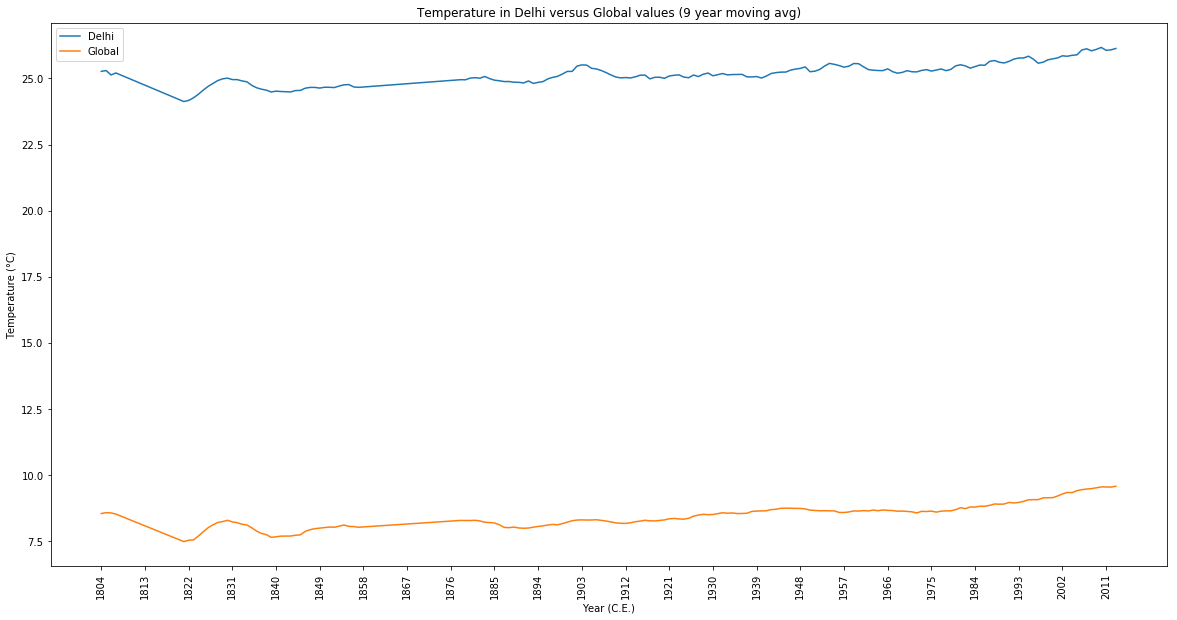

In [8]:
# Plot Moving Averages
min_year = mov_avg['year'].iloc[0]
max_year = mov_avg['year'].iloc[176]

plt.figure(figsize=(20,10))
plt.plot(mov_avg['year'], mov_avg['city_avg_temp'], label='Delhi')
plt.plot(mov_avg['year'], mov_avg['global_avg_temp'], label='Global')
plt.legend(loc='best')
#plt.grid(True)
plt.xticks(np.arange(min_year, max_year, 9.0), rotation='vertical')
plt.xlabel("Year (C.E.)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature in Delhi versus Global values ({} year moving avg)".format(roll_window_size))